In [2]:
import numpy as np 
import matplotlib.pyplot  as plt
import pandas as pd 

In [3]:
data= pd.read_csv('lgstcReg.txt', header=None)

In [4]:
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


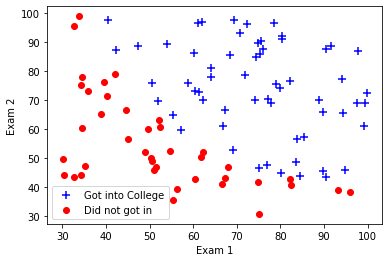

In [5]:
data_arr= data.values
X=data_arr[:,0:2]
y = data_arr[:,2]
m= len(X)

pos = (y==1).reshape(m,1)
neg= (y==0).reshape(m,1)
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c='b',marker="+",s=60)
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],c='r',marker="o")


plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend(["Got into College","Did not got in "],loc=0)

In [6]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [7]:
def CostFunction(X,y,theta):
    m= len(X)
    h= sigmoid(X.dot(theta))
    J=(1/m)* sum((-y*np.log(h))-((1-y)*np.log(1-h)))
    one_gradDes= 1/m * np.dot(X.transpose(),(h - y))
    return J[0],one_gradDes


In [8]:
def FeatureNormalization(X):
    mean= np.mean(X,axis=0)
    std= np.std(X,axis=0)
    return (X-mean)/std,mean,std

In [9]:
m= X.shape[0]
n= X.shape[1]
X,mean,std= FeatureNormalization(X)
X= np.append(np.ones((m,1)),X,axis=1)
y= y.reshape(m,1)
theta= np.zeros((n+1,1))
cost,first_gradDes= CostFunction(X,y,theta)
print(cost)




0.693147180559946


In [10]:
def GradientDescent(X,y,theta,learningRate, numOfIter):
    m= len(X)
    cost_history=[]
    for i in range(numOfIter):
        cost, grad= CostFunction(X, y, theta)
        theta= theta- (learningRate*grad)
        cost_history.append(cost)
    return theta,cost_history     

In [11]:

opt_theta,cost_history=GradientDescent(X,y,theta,1,400)
print(opt_theta)

[[1.65947664]
 [3.8670477 ]
 [3.60347302]]


Text(0.5, 1.0, 'Cost Function vs No. of Iteration')

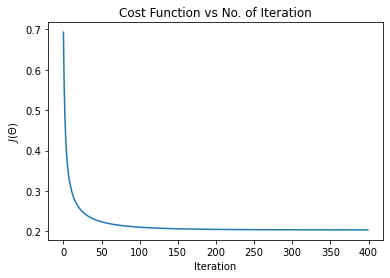

In [12]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost Function vs No. of Iteration")



[-1.83802631  1.76561835]
[ 1.5119466 -2.3552853]


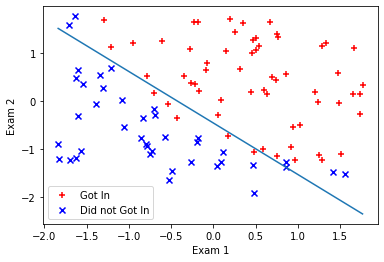

In [18]:
plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+",label="Got In")
plt.scatter(X[neg[:,0],1],X[neg[:,0],2],c="b",marker="x",label="Did not Got In")
x_value= np.array([np.min(X[:,1]),np.max(X[:,1])])

y_value=-(opt_theta[0] +opt_theta[1]*x_value)/opt_theta[2]
print(x_value)
print(y_value)
plt.plot(x_value,y_value, )
plt.xlabel("Exam 1")
plt.ylabel("Exam 2")
plt.legend(loc=0)

In [14]:
def Predict(X,theta):
    prediction= X.dot(theta)
    return prediction>0

In [15]:
x_data= np.array([45,85])
x_data= (x_data-mean)/std
x_data=np.append(np.ones(1),x_data)
chance=sigmoid(x_data.dot(opt_theta))
print(chance[0])

0.7677628875792492


In [16]:
p=Predict(X,opt_theta)
print("Training Accuracy : ", sum(p==y)[0],"%")

Training Accuracy :  89 %
